# Машинное обучение в диалоговых системах

Рады вас видеть на курсе по разработке диалоговых систем от Тинькофф Финтех школы! 

В рамках курса мы рассмотрим, как **обработка естественного языка** и **машинное обучение** используются для построения чат-бот систем, от начала и до конца.

<img src="https://media.giphy.com/media/aaZzZWqycDujC/giphy.gif" width="400">


Эта лекция вводная, в ней мы рассмотрим:
* предобработку текста
* представление текста
* понятие эмбеддинга
* текстовую классификацию

# 1. Предобработка текста

Текст на естественном языке, который нужно обрабатывать в задачах машинного обучения, сильно зависит от источника. Пример:

Википедия
> Литературный язык — обработанная часть общенародного языка, обладающая в большей или меньшей степени письменно закреплёнными нормами; язык всех проявлений культуры, выражающихся в словесной форме.

Твиттер
> Если у вас в компании есть люди, которые целый день сидят в чатиках и смотрят видосики, то, скорее всего, это ДАТАСАЕНТИСТЫ и у них ОБУЧАЕТСЯ

Ответы@Mail.ru
> как пишется "Вообщем лето было отличное" раздельно или слитно слово ВОобщем?? ?

В связи с этим, возникает задача предобработки (или нормализации) текста, то есть приведения к некоторому единому виду.

**Quiz: Какие шаги/действия можно производить и что это даст?**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
text = 'купил таблетки от тупости, но не смог открыть банку,ЧТО ДЕЛАТЬ???'

### 1.1 Приведение текста к нижнему регистру.

In [3]:
text = text.lower()
text

'купил таблетки от тупости, но не смог открыть банку,что делать???'

### 1.2.1 Удаление неинформативных символов.

Такими символами могут быть символы пунктуации, спец-символы, повторяющиеся символы, цифры. Для удаления подобных символов можно пользоваться стандартной библиотекой для [регулярных выражений](https://docs.python.org/3/library/re.html).

In [4]:
import re

In [5]:
regex = re.compile(r'(\W)\1+')
regex.sub(r'\1', text)

'купил таблетки от тупости, но не смог открыть банку,что делать?'

In [6]:
regex = re.compile(r'[^\w\s]')
regex.sub(r' ', text).strip()

'купил таблетки от тупости  но не смог открыть банку что делать'

### 1.2.2 Удаление неинформативных слов.

Плохие слова:
* Слишком частые
<br> &nbsp; русский язык: и, но, я, ты, ...
<br> &nbsp; английский язык: a, the, I, ...
<br> &nbsp; специфичные для коллекции: "сообщать" в новостях
* Слишком редкие
* Стоп-слова
<br> &nbsp; Предлоги, междометия, частицы, цифры

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dmitriy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords
sw_eng = set(stopwords.words('english'))
list(sw_eng)[:6]

["isn't", 'y', 'couldn', 'the', 'whom', 've']

In [9]:
from nltk.corpus import stopwords
sw_ru = set(stopwords.words('russian'))
list(sw_ru)[:6]

['был', 'всех', 'есть', 'для', 'во', 'ни']

In [10]:
sent = 'Разница между прежним и теперешнем его состоянием состояла в том, \
        что прежде, когда он забывал то, что было перед ним, то, что ему \
        говорили, он, страдальчески сморщив лоб, как будто пытался и не мог\
        разглядеть чего-то, далеко отстоящего от него. Теперь он также \
        забывал то, что ему говорили, и то, что было перед ним; но теперь \
        с чуть заметной, как будто насмешливой, улыбкой он в то самое, \
        что было перед ним, вслушивался в то, что ему говорили, хотя \
        очевидно видел и слышал что-то совсем другое...\
        Теперь улыбка радости жизни постоянно играла у его рта, и в глазах \
        его светилось участие к людям - вопрос: довольны ли они так же, как он?'
clean_sent = ' '.join([word for word in sent.split() if not word in sw_ru])
print('До {} слов'.format(len(sent.split())))
print('После {} слов'.format(len(clean_sent.split())))
clean_sent

До 111 слов
После 60 слов


'Разница прежним теперешнем состоянием состояла том, прежде, забывал то, ним, то, говорили, он, страдальчески сморщив лоб, пытался мог разглядеть чего-то, далеко отстоящего него. Теперь также забывал то, говорили, то, ним; заметной, насмешливой, улыбкой самое, ним, вслушивался то, говорили, хотя очевидно видел слышал что-то другое... Теперь улыбка радости жизни постоянно играла рта, глазах светилось участие людям - вопрос: довольны же, он?'

In [10]:
sent = 'быть или не быть'
clean_sent = ' '.join([word for word in sent.split() if not word in sw_ru])
print(clean_sent)

### 1.3 Разбиение текста на смысловые единицы (токенизация).

In [12]:
text = 'Купите кружку-термос "Hello Kitty" на 0.5л (64см³) за 3 рубля. До 01.01.2050.'

Самый простой подход к токенизации - это разбиение по текста по пробельным символам. 

**Quiz: Какая у этого подхода есть проблема?**

In [13]:
text.split()

['Купите',
 'кружку-термос',
 '"Hello',
 'Kitty"',
 'на',
 '0.5л',
 '(64см³)',
 'за',
 '3',
 'рубля.',
 'До',
 '01.01.2050.']

В библиотеке для морфологического анализа для русского языка [`pymorphy2`](https://pymorphy2.readthedocs.io/en/latest/) есть простая вспомогательная функция для токенизации.

In [13]:
from pymorphy2.tokenizers import simple_word_tokenize

simple_word_tokenize(text)

['Купите',
 'кружку-термос',
 '"',
 'Hello',
 'Kitty',
 '"',
 'на',
 '0',
 '.',
 '5л',
 '(',
 '64см³',
 ')',
 'за',
 '3',
 'рубля',
 '.',
 'До',
 '01',
 '.',
 '01',
 '.',
 '2050',
 '.']

Более сложной метод токенизации представлен в [`nltk`](https://www.nltk.org/): библиотеке для общего NLP.

In [14]:
import nltk

nltk.word_tokenize(text)

['Купите',
 'кружку-термос',
 '``',
 'Hello',
 'Kitty',
 "''",
 'на',
 '0.5л',
 '(',
 '64см³',
 ')',
 'за',
 '3',
 'рубля',
 '.',
 'До',
 '01.01.2050',
 '.']

Для русского языка также есть новая специализированная библиотека [`razdel`](https://github.com/natasha/razdel).

In [14]:
import razdel


def tokenize_with_razdel(text):
    return [token.text for token in razdel.tokenize(text)]


tokenize_with_razdel(text)

['Купите',
 'кружку-термос',
 '"',
 'Hello',
 'Kitty',
 '"',
 'на',
 '0.5',
 'л',
 '(',
 '64',
 'см³',
 ')',
 'за',
 '3',
 'рубля',
 '.',
 'До',
 '01.01.2050',
 '.']

In [16]:
hard_string = 'Привет. Ты видел мр.Смита сегодня утром?'
tmp_string = re.split(r'[!.?]', hard_string)
print(tmp_string)

['Привет', ' Ты видел мр', 'Смита сегодня утром', '']


In [17]:
hard_string = 'Привет. Ты видел мр.Смита сегодня утром?'
exp = r'(?<!\w\.\w.)(?<![А-Я][а-я]\.)(?<=\.|\?)\s'
tmp_string = re.split(exp, hard_string)
print(tmp_string)

['Привет.', 'Ты видел мр.Смита сегодня утром?']


### 1.4 Приведение слов к нормальной форме (стемминг, лемматизация)

**Стемминг - это нормализация слова путём отбрасывания окончания по правилам языка.**

Такая нормализация хорошо подходит для языков с небольшим разнообразием словоформ, например, для английского. В библиотеке [nltk](https://www.nltk.org/) есть несколько реализаций стеммеров:
 - [Porter stemmer](http://tartarus.org/martin/PorterStemmer/)
 - [Snowball stemmer](http://snowball.tartarus.org/)
 - [Lancaster stemmer](http://www.nltk.org/_modules/nltk/stem/lancaster.html)

In [16]:
from nltk.stem.snowball import SnowballStemmer

SnowballStemmer(language='english').stem('running')

'run'

In [17]:
from nltk.stem.snowball import SnowballStemmer

SnowballStemmer(language='english').stem('write wrote written')

'write wrote written'

Для русского языка этот подход не очень подходит, поскольку в русском есть падежные формы, время у глаголов и т.д.

In [20]:
SnowballStemmer(language='russian').stem('бежать')

'бежа'

**Лемматизация - приведение слов к начальной морфологической форме (с помощью словаря и грамматики языка).**

In [15]:
# Вспомогательная задача
from nltk import wordnet, pos_tag
def get_wordnet_pos(treebank_tag):
    my_switch = {
        'J': wordnet.wordnet.ADJ,
        'V': wordnet.wordnet.VERB,
        'N': wordnet.wordnet.NOUN,
        'R': wordnet.wordnet.ADV,
    }
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
            return item
    return wordnet.wordnet.NOUN

In [24]:
wordnet.wordnet.NOUN

'n'

In [20]:
sent = 'George admitted the talks happened'.split()
pos_tagged = pos_tag(sent)
print(pos_tagged)

[('George', 'NNP'), ('admitted', 'VBD'), ('the', 'DT'), ('talks', 'NNS'), ('happened', 'VBD')]


In [21]:
from nltk import WordNetLemmatizer
def my_lemmatizer(sent):
    lemmatizer = WordNetLemmatizer()
    tokenized_sent = sent.split()
    pos_tagged = [(word, get_wordnet_pos(tag))
                 for word, tag in pos_tag(tokenized_sent)]
    print(pos_tagged)
    return ' '.join([lemmatizer.lemmatize(word, tag)
                    for word, tag in pos_tagged])

In [25]:
sent = 'write wrote written'
print(my_lemmatizer(sent))

[('write', 'a'), ('wrote', 'v'), ('written', 'v')]
write write write


Для лемматизации русских слов есть несколько библиотек в свободном доступе:
- [pymorphy2](https://pymorphy2.readthedocs.io/en/latest/)
- [mystem3](https://tech.yandex.ru/mystem/)
- [maru](https://github.com/chomechome/maru)

Самый простой подход к лемматизации - словарный. Здесь не учитывается контекст слова, поэтому для омонимов такой подход работает не всегда. Такой подход применяет библиотека `pymorphy2`

In [25]:
from pymorphy2 import MorphAnalyzer

pymorphy = MorphAnalyzer()


def lemmatize_with_pymorphy(tokens):
    return [pymorphy.parse(token)[0].normal_form for token in tokens]

In [26]:
lemmatize_with_pymorphy(['мама', 'мыла', 'раму'])

['мама', 'мыло', 'рам']

Библиотека от Яндекса `mystem3` обходит это ограничение и рассматривает контекст слова, используя статистику и правила.

In [47]:
from pymystem3 import Mystem

mystem = Mystem()


def lemmatize_with_mystem(text):
    return [lemma for lemma in mystem.lemmatize(text) if not lemma.isspace()]

In [28]:
lemmatize_with_mystem('мама мыла раму')

['мама', 'мыть', 'рама']

Но на более сложных примерах такой подход тоже может сойтись к самому частотному варианту.

In [29]:
lemmatize_with_mystem('на заводе стали увидел виды стали')

['на', 'завод', 'становиться', 'увидеть', 'вид', 'становиться']

Библиотека `maru` использует машинное обучение и нейросети для разрешения омонимии.

In [26]:
import maru

maru_rnn = maru.get_analyzer('rnn')


def lemmatize_with_maru(tokens):
    return [morph.lemma for morph in maru_rnn.analyze(tokens)]

ModuleNotFoundError: No module named 'maru'

In [31]:
lemmatize_with_maru(['на', 'заводе', 'стали', 'увидел', 'виды', 'стали'])

['на', 'завод', 'сталь', 'увидеть', 'вид', 'сталь']

# 2. Представление текста

**Quiz: Как можно использовать токенизированные тексты в задачах NLP? Какие варианты представления текста можете назвать?**

### 2.1 One-Hot Encoding
<img src="https://cdn-images-1.medium.com/max/1200/1*YEJf9BQQh0ma1ECs6x_7yQ.png" width="500">

**Quiz: Что такое разреженная матрица?**

**Quiz: Какие есть плюсы и минусы у one-hot представления?**

Как получить one-hot? 

Сначала нам нужно каждому слову поставить в соответствие номер, а затем перевести их в бинарные вектора. 

Используем библиотеку [`scikit-learn`](https://scikit-learn.org/).

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

words = ['NLP', 'is', 'awesome']

label_encoder = LabelEncoder()
corpus_encoded = label_encoder.fit_transform(words)
corpus_encoded # какой вывод?

array([0, 2, 1])

In [33]:
label_encoder.classes_

array(['NLP', 'awesome', 'is'], dtype='<U7')

In [34]:
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit_transform(corpus_encoded.reshape(-1, 1)) # какой вывод?

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

В библиотеке для построения нейросетей [`keras`](https://keras.io/) есть более удобная функция для такого кодирования.

In [35]:
import keras.utils

keras.utils.to_categorical(corpus_encoded)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

### 2.2 Bag-of-words

**BoW** - "мешок слов". 

**Quiz: Что будет, если мы сложим все one-hot вектора слов в тексте?**
    

![](https://slideplayer.com/slide/7073400/24/images/15/The+Bag+of+Words+Representation.jpg)
Посчитаем количество слов в текстах

In [36]:
corpus = [
    'Дочь бьет Марго',
    'Тот кто бьет, не знает кто бьет его',
    'Кто кого бьет?',
    'Марго бьет дочь?',
]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit_transform(corpus).todense()

matrix([[1, 1, 0, 0, 0, 0, 1, 0, 0],
        [2, 0, 1, 1, 0, 2, 0, 1, 1],
        [1, 0, 0, 0, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [38]:
vectorizer.vocabulary_

{'дочь': 1,
 'бьет': 0,
 'марго': 6,
 'тот': 8,
 'кто': 5,
 'не': 7,
 'знает': 3,
 'его': 2,
 'кого': 4}

**Quiz: Какие минусы у такого представления?**


### 2.3 TF-IDF

**Term Frequency**  $tf(w,d)$ - сколько раз слово $w$ встретилось в документе $d$

**Document Frequency** $df(w)$ - сколько документов содержат слово $w$

**Inverse Document Frequency** $idf(w) = log_2(N/df(w))$  — обратная документная частотность. 

**TF-IDF**=$tf(w,d)*idf(w)$




In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

idf_vectorizer = TfidfVectorizer()
idf_vectorizer.fit_transform(corpus).todense()

matrix([[0.42389674, 0.64043405, 0.        , 0.        , 0.        ,
         0.        , 0.64043405, 0.        , 0.        ],
        [0.37919167, 0.        , 0.36332075, 0.36332075, 0.        ,
         0.5728925 , 0.        , 0.36332075, 0.36332075],
        [0.37919167, 0.        , 0.        , 0.        , 0.72664149,
         0.5728925 , 0.        , 0.        , 0.        ],
        [0.42389674, 0.64043405, 0.        , 0.        , 0.        ,
         0.        , 0.64043405, 0.        , 0.        ]])

In [40]:
idf_vectorizer.vocabulary_

{'дочь': 1,
 'бьет': 0,
 'марго': 6,
 'тот': 8,
 'кто': 5,
 'не': 7,
 'знает': 3,
 'его': 2,
 'кого': 4}

# 3. Классификация

**Quiz: Что это за задача? Какие ещё задачи решаются в машинном обучении?**

Мы попробуем применить описание методы предобработки и представления текста на примере анализа тональности текста. В качестве данных будем использовать небольшой датасет твитов. Всего в данных 2 класса: позитив и негатив.

### 3.1 Загрузка тренировочных и тестовых данных

**Quiz: Зачем нам разделять данные на тренировочные и тестовые?**

Загрузим тренировочные и тестовые данные при помощи библиотеки [`pandas`](https://pandas.pydata.org/).

In [27]:
import pandas as pd

train = pd.read_csv('train.csv')
train.shape

(6929, 2)

In [28]:
train.head()

,label,text
0,positive,эти розы для прекрасной мамочки)))=_=]]
1,negative,"И да, у меня в этом году серьезные проблемы со..."
2,positive,"♥Обожаю людей, которые заставляют меня смеятьс..."
3,negative,Вчера нашла в почтовом ящике пустую упаковку и...
4,positive,очень долгожданный и хороший день был)


In [29]:
train.label.value_counts()

positive    4635
negative    2294
Name: label, dtype: int64

In [30]:
test = pd.read_csv('test.csv')
test.shape

(794, 2)

In [31]:
test.head()

,label,text
0,positive,#ахахах ...
1,negative,"я очень устал в этом году. очень. расскажите,..."
2,negative,НЕ ТОРОПИТЕСЬ ЖИТЬ!!! сегодня на моих глазах о...
3,positive,"Когда я его обнимаю, я закрываю глаза, уткнувш..."
4,negative,меня надо усыпить О_О


In [32]:
test.label.value_counts()

positive    536
negative    258
Name: label, dtype: int64

### 3.2 Оценка качества

**Quiz: Как оценить качество модели в задаче классификации?**

<center>
<table style="width:40%">
  <tr>
    <th></th>
    <th> y = 1 </th> 
    <th> y = 0 </th>
  </tr>
  <tr>
    <th> a(x) = 1 </th>
    <td> True Positive (TP) </td> 
    <td> False Positive (FP) </td>
  </tr>
  <tr>
    <th> a(x) = 0 </th>
    <td> False Negative (FN) </td> 
    <td> True Negative (TN) </td>
  </tr>
</table>
<br>
$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
<br><br>
$Precision = \frac{TP}{TP + FP}$
<br><br>
$Recall = \frac{TP}{TP + FN}$
<br><br>
$F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$
</center>

### 3.3 Построение модели

Напишем функцию для оценки векторизатора. В качестве модели будем использовать линейный SVM, он хорошо работает для определения тональности.  

**Quiz: Какая модель машинного обучения называется линейной? Почему мы используем линейную модель в задаче?**

In [33]:
%matplotlib inline

import tqdm
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


def evaluate_vectorizer(vectorizer):
    X = vectorizer.fit_transform(tqdm.tqdm_notebook(train.text, desc='Vectorizing train:'))

    model = LinearSVC(random_state=42)
    model.fit(X, train.label)
    
    X_test = vectorizer.transform(tqdm.tqdm_notebook(test.text, desc='Vectorizing test:'))
    predictions = model.predict(X_test)
    
    print(classification_report(test.label, predictions))
    return predictions

### 3.4 Сравнение способов представления текста

In [41]:
evaluate_vectorizer(CountVectorizer(min_df=2));


              precision    recall  f1-score   support

    negative       0.73      0.62      0.67       258
    positive       0.83      0.89      0.86       536

   micro avg       0.80      0.80      0.80       794
   macro avg       0.78      0.75      0.76       794
weighted avg       0.80      0.80      0.80       794



In [42]:
evaluate_vectorizer(TfidfVectorizer(min_df=2));


              precision    recall  f1-score   support

    negative       0.76      0.65      0.70       258
    positive       0.84      0.90      0.87       536

   micro avg       0.82      0.82      0.82       794
   macro avg       0.80      0.78      0.79       794
weighted avg       0.82      0.82      0.82       794



In [43]:
evaluate_vectorizer(TfidfVectorizer(min_df=2, tokenizer=tokenize_with_razdel));


              precision    recall  f1-score   support

    negative       0.78      0.76      0.77       258
    positive       0.89      0.90      0.89       536

   micro avg       0.85      0.85      0.85       794
   macro avg       0.83      0.83      0.83       794
weighted avg       0.85      0.85      0.85       794



In [48]:
tfidf_vectorizer = TfidfVectorizer(
    min_df=2, 
    tokenizer=lambda text: [lemma for lemma in mystem.lemmatize(text) if not lemma.isspace()])

predictions = evaluate_vectorizer(tfidf_vectorizer)

              precision    recall  f1-score   support

    negative       0.83      0.80      0.81       258
    positive       0.91      0.92      0.91       536

   micro avg       0.88      0.88      0.88       794
   macro avg       0.87      0.86      0.86       794
weighted avg       0.88      0.88      0.88       794



In [44]:
tfidf_vectorizer = TfidfVectorizer(
    min_df=2, 
    tokenizer=lambda text: lemmatize_with_maru(tokenize_with_razdel(text)),
)
predictions = evaluate_vectorizer(tfidf_vectorizer)

NameError: name 'lemmatize_with_maru' is not defined

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix_heatmap(true, predicted):
    classes = true.unique()
    matrix = confusion_matrix(true, predicted, labels=classes)
    sns.heatmap(matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt='g')

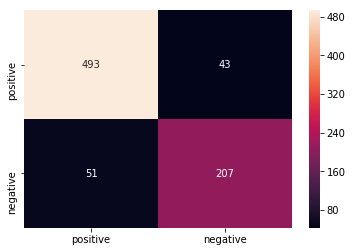

In [50]:
plot_confusion_matrix_heatmap(test.label, predictions)

# 4. Embeddings (word2vec и друзья)

Embedding - это векторное представление слова.

| Слово  |Вектор          |
|--------|---------------|
| Щенок  |[0.9, 1.0, 0.0]|
| Пёс    |[1.0, 0.2, 0.0]|
| Котёнок |[0.0, 1.0, 0.9]|
| Кот    |[0.0, 0.2, 1.0]|

Например, в таблице первая компонента вектора эмбеддинга отражает "собачность" слова, вторая отвечает за "молодость", а третья - за "кошачность".

### 4.1 W2V Embeddings
Лингвист John Firth (1957):
> "You shall know a word by the company it keeps" 
> ("Скажи мне кто друг твоего слова и скажу что это за слово")

[T.Mikolov et al, 2013](https://arxiv.org/abs/1301.3781)
<img src="https://adriancolyer.files.wordpress.com/2016/04/word2vec-context-words.png?w=600" width="600">

Как такие вектора будут расположены в пространстве? 

> Встреча президента России Путина и президента США Обамы состоялась вчера в Кремле.

> Президент США, Барак Обама, вчера уехал из Вашингтона.


[Интерактивно на projector.tensorflow](http://projector.tensorflow.org/?config=https://gist.githubusercontent.com/akutuzov/fd57a53a6aeec15c3497c54bc42a9af8/raw/c29e04ee34dc7ffad8d8bcccc8da2d5905259fcc/tayga_none_fasttextcbow_300_10_2019_b7b71a84a9796c369d8566d6c64d75ee_config.json)

<img src="https://raw.githubusercontent.com/fogside/fintech_dev/ekb/spring_2019/01_text_preprocessing_and_representation/w2v_pca.png?token=AgsinKF23DsHdd4YfY9qINJWH56E4PlTks5cZIWSwA%3D%3D" width="900">

$$Cosine: cos(\theta) = \frac{A \cdot B}{\lVert A \rVert \cdot \lVert B \rVert}$$


$$Euclidean: d(A, B) = \sqrt{\sum{(A - B)^2}}$$

<img src="https://i.stack.imgur.com/QlFJt.png" width="500">

Встречаем **Word2Vec**, модель, с помощью которой можно обучить такие эмбедденги. 
<img src="https://raw.githubusercontent.com/fogside/fintech_dev/ekb/spring_2019/01_text_preprocessing_and_representation/w2v_calc.png?token=AgsinCBMS0RHNVdbwKtOyE-JvfAsMF5Aks5cZIDhwA%3D%3D" width="600">

Есть 2 взаимно-обратные архитектуры Word2Vec: CBOW и Skip-Gram:   
<img src="https://cdn-images-1.medium.com/max/2000/0*o2FCVrLKtdcxPQqc.png" width="600">


**Quiz: Как можно представить вектор размерностью 300 в виде вектора размерности 3?**

### 4.2 Skip-Gram model

[Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

[Word2Vec Tutorial Part 2 - Negative Sampling](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)

Обучающая выборка:

<img src="https://cdn-images-1.medium.com/max/1600/0*0m03CiSHWl4f2dae.png" width="600">

**Quiz: В каком виде подать слово на вход нейронной сети?**


Модель:

<img src="https://cdn-images-1.medium.com/max/1600/0*FTfdlZ7yDBoQ8c9W.png" width="800">

Откуда же мы получаем эмбеддинг?

<img src="https://cdn-images-1.medium.com/max/800/0*6DOQn6gxvEoix0yn.png" width="500">

<img src="http://mccormickml.com/assets/word2vec/matrix_mult_w_one_hot.png" width="500">

Для обучения своей модели word2vec удобно использовать библиотеку [`gensim`](https://radimrehurek.com/gensim/).

# 5. И снова классификация

Попробуем теперь написать свой векторизатор на основе `word2vec`. Чтобы получить вектор текста, будем брать word2vec-вектора отдельных слов, суммировать в один вектор и затем этот вектор нормализовать.

Для начала скачаем word2vec модель, построенную по новостным заголовкам в рамках проекта [RusVectōrēs](https://rusvectores.org/ru/models/). 

In [54]:
import io
import gzip
import pathlib
import urllib.request

WORD2VEC_PATH = pathlib.Path('word2vec.bin')

if not WORD2VEC_PATH.exists():
    url = 'https://rusvectores.org/static/models/rusvectores2/news_mystem_skipgram_1000_20_2015.bin.gz'
    with urllib.request.urlopen(url) as connection:
        compressed = connection.read()
            
    decompressed = gzip.GzipFile(fileobj=io.BytesIO(compressed), mode='rb').read()
    WORD2VEC_PATH.write_bytes(decompressed)

Чтобы воспользоваться векторами из этой модели, также обратимся к библиотеке `gensim`.

In [55]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format(WORD2VEC_PATH, binary=True)

Эта конкретная модель обучалась не на простых токенах, а на токенах и их частеречных тегах из MyStem.

In [56]:
word2vec.most_similar(positive=['путин_S', 'вашингтон_S'], negative=['москва_S'])

[('обама_S', 0.4460664987564087),
 ('барак_S', 0.37829941511154175),
 ('вашингтонский_A', 0.3590691089630127),
 ('washington_UNKN', 0.35556167364120483),
 ('президент_S', 0.33835840225219727),
 ('союзник_S', 0.3376995921134949),
 ('заокеанский_A', 0.33447808027267456),
 ('госдеп_S', 0.333746999502182),
 ('сша_S', 0.3223333954811096),
 ('путинский_A', 0.31731104850769043)]

Сначала напишем функцию, которая получает частеречный разбор из MyStem и возвращает токены вида `<слово>_<часть речи>`.

In [57]:
word2vec_mystem = Mystem(entire_input=False)


def tokenize_with_mystem_pos(text):
    result = []
    
    for item in word2vec_mystem.analyze(text):
        if item['analysis']:
            lemma = item['analysis'][0]['lex']
            pos = re.split('[=,]', item['analysis'][0]['gr'])[0]
            token = f'{lemma}_{pos}'
        else:
            token = f'{item["text"]}_UNKN'
            
        result.append(token)

    return result

Затем напишем класс, который по списку текстов возвращает вектора, полученные с помощью word2vec модели.

In [58]:
import numpy as np
from sklearn.base import TransformerMixin


class Word2VecVectorizer(TransformerMixin):
    def __init__(self, vectors):
        self.vectors = vectors
        self.zeros = np.zeros(self.vectors.vector_size)
        
    def _get_text_vector(self, text):
        token_vectors = []
        for token in tokenize_with_mystem_pos(text):
            try:
                token_vectors.append(self.vectors[token])
            except KeyError: # не нашли такой токен в словаре
                pass
                
        if not token_vectors:
            return self.zeros

        text_vector = np.sum(token_vectors, axis=0)
        return text_vector / np.linalg.norm(text_vector)
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return np.array([self._get_text_vector(text) for text in X])

In [59]:
word2vec_vectorizer = Word2VecVectorizer(word2vec)

evaluate_vectorizer(word2vec_vectorizer);

A Jupyter Widget

A Jupyter Widget


             precision    recall  f1-score   support

   negative       0.77      0.67      0.72       258
   positive       0.85      0.90      0.88       536

avg / total       0.83      0.83      0.83       794



Tf-idf и word2vec представления текста имеет смысл комбинировать при обучении линейных моделей.

In [60]:
from sklearn.pipeline import FeatureUnion

evaluate_vectorizer(
    FeatureUnion(
        [
            ('tf-idf', tfidf_vectorizer),
            ('word2vec', word2vec_vectorizer),
        ]
    )
);

A Jupyter Widget

A Jupyter Widget


             precision    recall  f1-score   support

   negative       0.85      0.82      0.83       258
   positive       0.91      0.93      0.92       536

avg / total       0.89      0.89      0.89       794



~~Никакого~~ большого прироста в качестве мы не получили, но можно заметить, что полнота по негативу и точность по позитиву слегка выросли.